<a href="https://colab.research.google.com/github/real-horizon02/Call-Center-Performance-Report/blob/main/Call_Center_Performance_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== CALL CENTER KPIs ===
Total Calls: 260
Average Call Duration: 561.45 sec
Average Resolution Time: 721.19 sec
First Call Resolution Rate: 49.62%
Average CSAT Score: 3.06


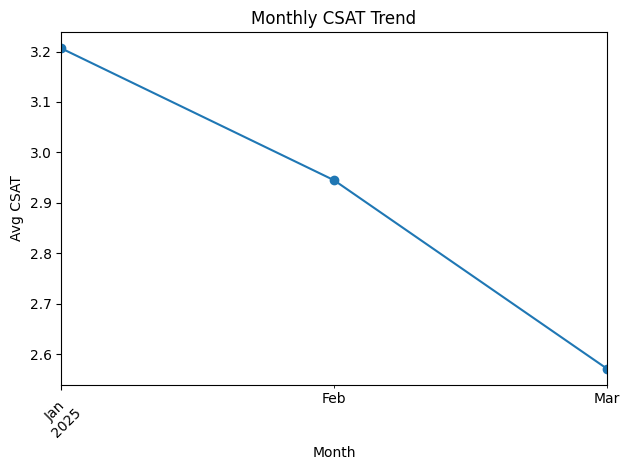

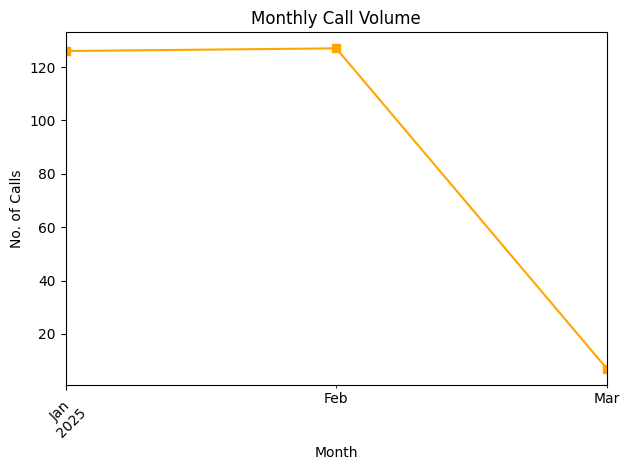

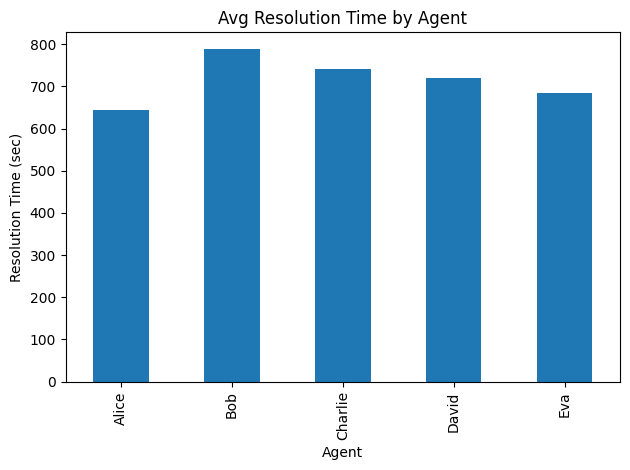

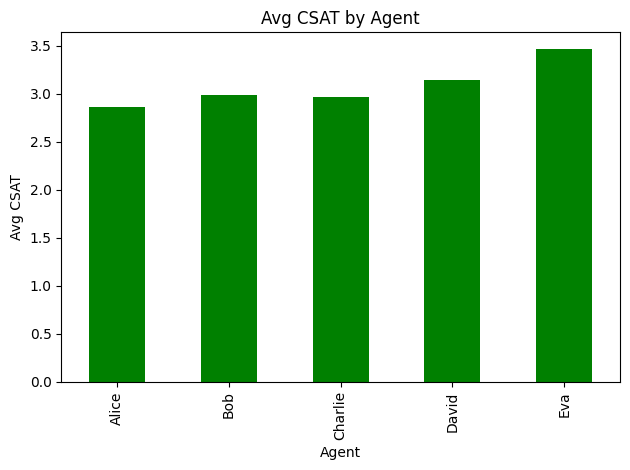

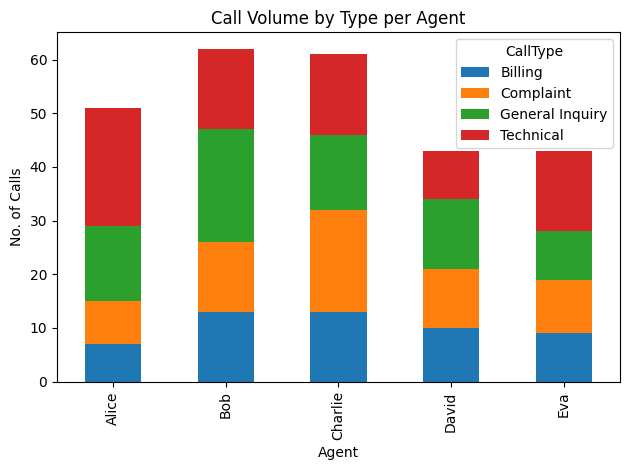

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Load dataset

df = pd.read_csv("call_logs.csv", parse_dates=["Date"])


# 2. KPI Calculations

total_calls = len(df)
avg_duration = df["Duration"].mean()
avg_resolution = df["ResolutionTime"].mean()
fcr_rate = df["FCR"].mean() * 100
avg_csat = df["CSAT"].mean()

print("=== CALL CENTER KPIs ===")
print(f"Total Calls: {total_calls}")
print(f"Average Call Duration: {avg_duration:.2f} sec")
print(f"Average Resolution Time: {avg_resolution:.2f} sec")
print(f"First Call Resolution Rate: {fcr_rate:.2f}%")
print(f"Average CSAT Score: {avg_csat:.2f}")
print("========================")


# 3. Visualizations

# (A) Monthly CSAT Trend
monthly_csat = df.groupby(df["Date"].dt.to_period("M"))["CSAT"].mean()
monthly_csat.plot(kind="line", marker="o", title="Monthly CSAT Trend")
plt.ylabel("Avg CSAT")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (B) Monthly Call Volume
monthly_calls = df.groupby(df["Date"].dt.to_period("M"))["CallID"].count()
monthly_calls.plot(kind="line", marker="s", color="orange", title="Monthly Call Volume")
plt.ylabel("No. of Calls")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# (C) Avg Resolution Time by Agent
df.groupby("Agent")["ResolutionTime"].mean().plot(kind="bar", title="Avg Resolution Time by Agent")
plt.ylabel("Resolution Time (sec)")
plt.tight_layout()
plt.show()

# (D) Avg CSAT by Agent
df.groupby("Agent")["CSAT"].mean().plot(kind="bar", color="green", title="Avg CSAT by Agent")
plt.ylabel("Avg CSAT")
plt.tight_layout()
plt.show()

# (E) Call Volume by Type per Agent
pd.crosstab(df["Agent"], df["CallType"]).plot(kind="bar", stacked=True, title="Call Volume by Type per Agent")
plt.ylabel("No. of Calls")
plt.tight_layout()
plt.show()